In [3]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

ModuleNotFoundError: No module named 'qiskit_textbook'

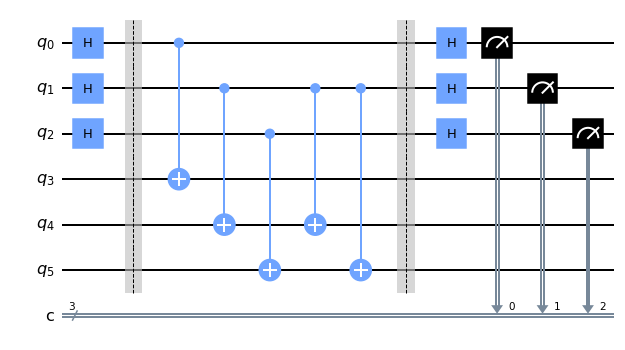

In [5]:
b = "110"
# sc = simon_circuit, so = simon_oracle
n = len(b)
sc = QuantumCircuit(n*2, n)
so = QuantumCircuit(n*2)
# apply Hadamard gates before querying the oracle 
sc.h(range(n))

sc.barrier()
# making the oracle
so.cx(0, 3)
so.cx(1, 4)
so.cx(2, 5)
so.cx(1, 4)
so.cx(1, 5)
sc += so

sc.barrier()
# apply hadamard to the input register
sc.h(range(n))

# measure qubits
sc.measure(range(n), range(n))
sc.draw("mpl")

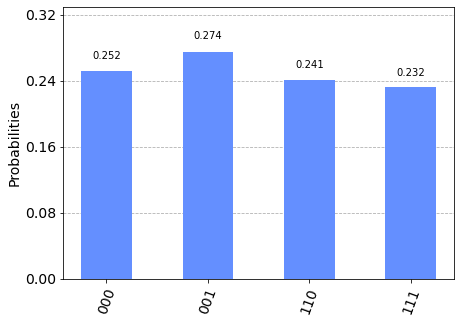

In [9]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(sc, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)
for z in counts:
    print("{}, {} = {} (mod 2)".format(b, z, bdotz(b, z)))
    

110, 000 = 0 (mod 2)
110, 111 = 0 (mod 2)
110, 110 = 0 (mod 2)
110, 001 = 0 (mod 2)
